In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x_data = np.linspace(0.0,10.0,1000000)

In [3]:
noise = np.random.rand(len(x_data))

y = mx + b

b = 5


In [4]:
y_true = (0.5 * x_data) + 5 + noise

In [5]:
x_df = pd.DataFrame(x_data,columns=['X Data'])
y_df = pd.DataFrame(y_true,columns=['Y'])

In [6]:
my_data = pd.concat([x_df,y_df],axis=1)

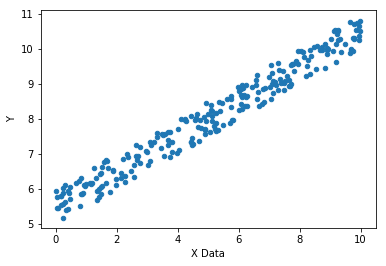

In [7]:
my_data.sample(250).plot(kind = 'scatter', x = 'X Data', y = 'Y')

In [8]:
batch_size = 8

In [9]:
m = tf.Variable(np.random.randn(2)[0])
b = tf.Variable(np.random.randn(2)[1])
m ,b 

(<tf.Variable 'Variable:0' shape=() dtype=float64_ref>,
 <tf.Variable 'Variable_1:0' shape=() dtype=float64_ref>)

In [10]:
xph = tf.placeholder(tf.float64,[batch_size])

In [11]:
yph = tf.placeholder(tf.float64,[batch_size]) 

In [12]:
y_model = m*xph + b

In [13]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [14]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [15]:
train = optimizer.minimize(error)

In [16]:
init = tf.global_variables_initializer()

In [17]:
with tf.Session() as sess:
    sess.run(init)
    batches = 10000
    
    for i in range(batches):
        rand_int = np.random.randint(len(x_data),size=batch_size)
        feed = {xph:x_data[rand_int],yph:y_true[rand_int]}
        sess.run(train,feed_dict=feed)
    model_m, model_b = sess.run([m,b])

In [18]:
model_m,model_b

(0.51365471223273684, 5.5217494893959556)

In [19]:
y_hat = x_data*model_m + model_b

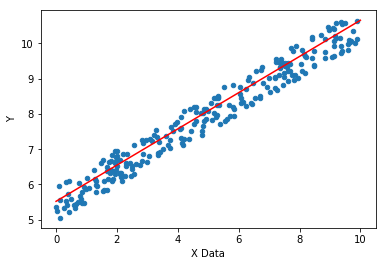

In [20]:
my_data.sample(250).plot(kind='scatter',x='X Data', y = 'Y')
plt.plot(x_data,y_hat,'r')

## TF ESTIMATOR

In [21]:
feat_cols = [tf.feature_column.numeric_column('x',shape=((1,)))]

In [22]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Rakshith\\AppData\\Local\\Temp\\tmpiw96pjaj', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001B2E06B3550>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data,y_true,
                                                    test_size=0.3, random_state=101)

In [25]:
x_train.shape, x_eval.shape

((700000,), (300000,))

In [26]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size = 8, 
                                                num_epochs=None, shuffle = True)

In [27]:
train_input_func =  tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size = 8, 
                                                num_epochs=1000, shuffle = False)

In [28]:
eval_input_func =  tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size = 8, 
                                                num_epochs=1000, shuffle = False)

In [29]:
estimator.train(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Rakshith\AppData\Local\Temp\tmpiw96pjaj\model.ckpt.
INFO:tensorflow:loss = 523.689, step = 1
INFO:tensorflow:global_step/sec: 221.224
INFO:tensorflow:loss = 26.5018, step = 101 (0.448 sec)
INFO:tensorflow:global_step/sec: 235.065
INFO:tensorflow:loss = 14.7812, step = 201 (0.429 sec)
INFO:tensorflow:global_step/sec: 247.576
INFO:tensorflow:loss = 6.20121, step = 301 (0.404 sec)
INFO:tensorflow:global_step/sec: 229.359
INFO:tensorflow:loss = 7.32301, step = 401 (0.436 sec)
INFO:tensorflow:global_step/sec: 231.49
INFO:tensorflow:loss = 3.35487, step = 501 (0.428 sec)
INFO:tensorflow:global_step/sec: 223.229
INFO:tensorflow:loss = 3.04697, step = 601 (0.452 sec)
INFO:tensorflow:global_step/sec: 229.358
INFO:tensorflow:loss = 2.49298, step = 701 (0.440 sec)
INFO:tensorflow:global_step/sec: 229.357
INFO:tensorflow:loss = 4.67043, step = 801 (0.432 sec)
INFO:tensorflow:global_step/sec: 202.782


In [30]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Starting evaluation at 2018-12-23-06:11:18
INFO:tensorflow:Restoring parameters from C:\Users\Rakshith\AppData\Local\Temp\tmpiw96pjaj\model.ckpt-1000
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-12-23-06:11:21
INFO:tensorflow:Saving dict for global step 1000: average_loss = 0.211824, global_step = 1000, loss = 1.69459


In [31]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-12-23-06:11:22
INFO:tensorflow:Restoring parameters from C:\Users\Rakshith\AppData\Local\Temp\tmpiw96pjaj\model.ckpt-1000


KeyboardInterrupt: 